In [1]:
import os
from classy import Class
import numpy as np
from matplotlib import pyplot as plt
import initial
from cov_PP import ClassCovariancePP

In [2]:
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
h = .6777
Omega_m = .307115
omega_b = 0.048206*h**2
sigma8_0 = .8288

# CLASS cosmo
params_cosmo = {
    'output': 'tCl mPk',
    'h': h,
    'omega_b': omega_b,
    'omega_cdm': Omega_m*h**2 - omega_b,
    'sigma8':sigma8_0,
    'n_s':.961,
    'tau_reio': 0.0826026,
    'N_ur': 2.,
    'z_max_pk': 3.,
    'P_k_max_h/Mpc': 50.,
    }

cosmo = Class()
cosmo.set(params_cosmo)
cosmo.compute()

initial_cosmo = initial.InputPowerSpectrum(.51, cosmo, params_fid=params_cosmo)
initial_cosmo.calcMatterPowerSpectrum()
k_in, pk_in = initial_cosmo.getMatterPowerSpectrum()
sigma8 = initial_cosmo.getSigma8z(sigma8_0)
f_of_z = initial_cosmo.getGrowthRate()

params = {'sigma8':sigma8,'fz':f_of_z,'b1':2,'alpha_perp':1,
          'alpha_parallel':1,'b2':0,'b3':0,'bK2':0,'bK3':0,'bDK':0,'bO':0,}
kbin = np.arange(0.02, 0.22, .02)
volume = 1.76e9
nz = 3.26e-4
dk = .02

In [4]:
cov_PT_G = np.loadtxt("/home/rneveux/data/BOSS/Cov/RESULTS_COV_BOSS_North/RESULTS_COV_BOSS_North_ZBIN2/cov_pk0_pk0", usecols=(2,)).reshape(10,10)
cov_PT_NG = np.loadtxt("/home/rneveux/data/BOSS/Cov/RESULTS_COV_BOSS_North/RESULTS_COV_BOSS_North_ZBIN2/cov_pk0_pk0", usecols=(3,)).reshape(10,10)
cov_PT = cov_PT_G + cov_PT_NG
k_nao = np.linspace(0.02, 0.20,10)

In [5]:
coeff_PT_G = np.zeros(cov_PT_G.shape)
coeff_PT_NG = np.zeros(cov_PT_NG.shape)
coeff_PT = np.zeros(cov_PT_NG.shape)
for i in range(10):
    for j in range(10):
        coeff_PT_G[i,j] = cov_PT_G[i,j] / np.sqrt(cov_PT[i,i]*cov_PT[j,j])
        coeff_PT_NG[i,j] = cov_PT_NG[i,j] / np.sqrt(cov_PT[i,i]*cov_PT[j,j])
        coeff_PT[i,j] = cov_PT[i,j] / np.sqrt(cov_PT[i,i]*cov_PT[j,j])

In [4]:
%%time
covpp_boss = ClassCovariancePP()
covpp_boss.set_params(params)
covpp_boss.set_input_pk(k_in,pk_in)

CPU times: user 122 µs, sys: 9 µs, total: 131 µs
Wall time: 142 µs


In [5]:
%%time
cpp_boss = covpp_boss.calc_cov_PP( 'cov_PP_G', kbin=kbin, volume = volume, nmean = nz, deltaK = dk)

CPU times: user 59.7 ms, sys: 3.98 ms, total: 63.7 ms
Wall time: 152 ms


In [6]:
%%time
cpp_boss_ng = covpp_boss.calc_cov_PP( 'cov_PP_NG', kbin=kbin, volume = volume, nmean = nz, deltaK = dk)

k1 =  0.02 h/Mpc
k1 =  0.04 h/Mpc
k1 =  0.06 h/Mpc
k1 =  0.08 h/Mpc
k1 =  0.1 h/Mpc
k1 =  0.12000000000000001 h/Mpc
k1 =  0.13999999999999999 h/Mpc
k1 =  0.16 h/Mpc
k1 =  0.18 h/Mpc
k1 =  0.19999999999999998 h/Mpc
CPU times: user 3min 40s, sys: 384 ms, total: 3min 41s
Wall time: 3min 41s


In [9]:
cpp_boss_g_ng = cpp_boss['cov_PP']+cpp_boss_ng['cov_PP']

In [10]:
coeff_me_g = cpp_boss['cov_PP']/np.sqrt(np.diag(cpp_boss_g_ng))
coeff_me_g/= np.sqrt(np.diag(cpp_boss_g_ng)).T
coeff_me = cpp_boss_g_ng/np.sqrt(np.diag(cpp_boss_g_ng))
coeff_me/= np.sqrt(np.diag(cpp_boss_g_ng)).T

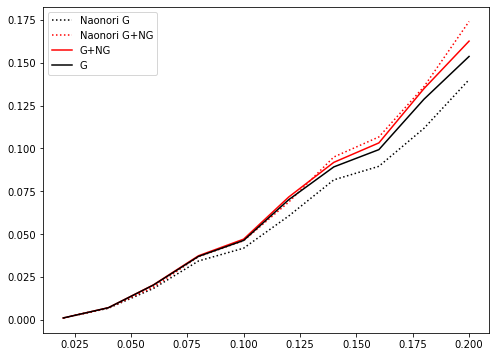

In [11]:
plt.plot(k_nao, k_nao**6 * np.diag(cov_PT_G), label=r"Naonori G", linestyle=':', color='k')
plt.plot(k_nao, k_nao**6 * np.diag(cov_PT), label=r"Naonori G+NG", linestyle=':', color='r')
plt.plot(cpp_boss_ng['kbin1'][:,0], cpp_boss_ng['kbin1'][:,0]**6*(np.diag(cpp_boss_g_ng)), label=r"G+NG", color='r')
plt.plot(cpp_boss_ng['kbin1'][:,0], cpp_boss_ng['kbin1'][:,0]**6*(np.diag(cpp_boss['cov_PP'])), label=r"G", color='k')
plt.legend()

0.08000000000000002


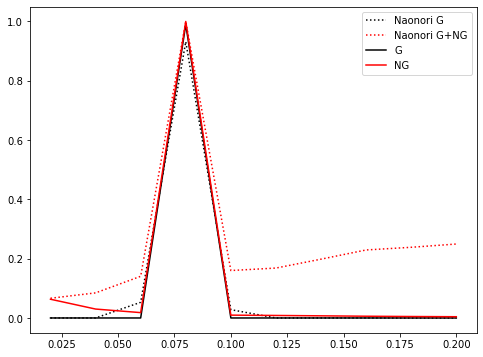

0.16


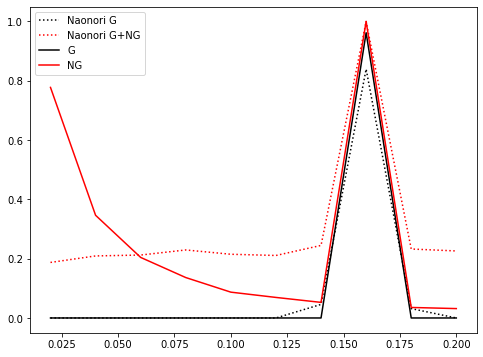

In [12]:
for KK in [3,7]:
    print(k_nao[KK])
    plt.plot(k_nao, coeff_PT_G[:, KK],  "k:", label=r"Naonori G")
    plt.plot(k_nao, coeff_PT[:, KK],  "r:", label=r"Naonori G+NG")
    plt.plot(cpp_boss_ng['kbin1'][:,0], coeff_me_g[:, KK],  "k", label=r"G")
    plt.plot(cpp_boss_ng['kbin1'][:,0], coeff_me[:, KK],  "r", label=r"NG")
    plt.legend()
    plt.show()